# Project: Wrangling and Analyze Data

# Data Wrangling
## Introduction

Real-world data rarely comes clean. Using Python and its libraries, i'll gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document the wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries).

The dataset that will be used for wrangling, analyzing and visualizing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

WeRateDogs provided their Twitter archive and sent it to Udacity via email exclusively for use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

The goal of this project is to wrangle data from WeRateDogs Twitter's account using Python and document the whole process in a Jupyter Notebook named wrangle_act.ipynb i.e. this notebook. My aim is to wrangle this data for interesting and trustworthy analyses using visualizations.

## Project Details

Fully assessing and cleaning the entire dataset would require exceptional effort so only a subset of its issues (eight quality issues and two tidiness issues at minimum) needed to be assessed and cleaned.The tasks for this project were:

 1. Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data
 2. Storing, analyzing, and visualizing our wrangled data
 3. Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations


## Gathering Data for this Project
### Enhanced Twitter Archive

The WeRateDogs Twitter archive is provided by Udacity. This contains basic tweet data for all 5000+ of their tweets, but not everything.Download this file manually by clicking the following link: [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv). Once it is downloaded, upload it and read the data into a pandas DataFrame.

### Image Predictions File

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL:https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

### Additional Data via the Twitter API
Gather **each tweet's retweet count** and **favorite ("like") count** at the minimum, and any additional data of interest. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) **tweet ID**, **retweet count**, and **favorite count**.

## Key Points

Key points to keep in mind when data wrangling for this project:

 - We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
 - Fully assessing and cleaning the entire dataset requires exceptional effort so only a subset of its issues (eight (8) quality issues and two (2) tidiness issues at minimum) need to be assessed and cleaned.
 - Cleaning includes merging individual pieces of data according to the rules of tidy data.
 - The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
 - We do not need to gather the tweets beyond August 1st, 2017. We can, but note that we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used.

## Acceptance Criterion
1. Assessing Data for this Project
   - Detect and document at least eight (8) quality issues
   - Two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook.
   

2. Cleaning Data for this Project
   - Clean each of the issues you documented while assessing.
   - The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate).
   

3. Storing, Analyzing, and Visualizing Data for this Project
   - Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv.
   - If additional files exist because multiple tables are required for tidiness, name these files appropriately.
   - Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).


4. Analyze and visualize your wrangled data.
   - At least three (3) insights and
   - one (1) visualization must be produced
   

5. Reporting for this Project

   - Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

   - Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

# Import required libraries

In [1429]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import config
import seaborn as sns
from datetime import datetime
from IPython.display import Image
from functools import reduce
%matplotlib inline
plt.style.use('seaborn-notebook')

pd.set_option('max_colwidth', None)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
## 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1430]:
df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [1431]:
#df_twitter_archive_enhanced.tail(3)

In [1432]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [1433]:
image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_prediction_url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

df_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_prediction.style.set_properties(subset=['jpg_url'], **{'width': '300px'})

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790144,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032448,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822464,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694656,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405376,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [1434]:
df_image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [1435]:
#df_image_prediction.tail(3)

In [1436]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [1551]:
consumer_key = 'XXXXX'
consumer_key_secret = 'XXXXX'

access_token = 'XXXXX'
access_token_secret = 'XXXXX'

#authenication of our App to the twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)

# Make an api instance 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

### References for
### tweepy error code 
 - https://www.programiz.com/python-programming/methods/built-in/enumerate
 - https://www.geeksforgeeks.org/enumerate-in-python/
 
#### and `enumerate method` 
 - https://stackoverflow.com/questions/17157753/get-the-error-code-from-tweepy-exception-instance
 
#### measure elapsed time in Python
 - https://stackoverflow.com/questions/7370801/how-do-i-measure-elapsed-time-in-python
 
#### Show a Tweet’s JSON Response
 - https://www.jcchouinard.com/tweepy-json-response-for-tweets/

In [ ]:
print('Start time:', datetime.now().time())
start_time = time.time()

df_tweet_ids = df_twitter_archive_enhanced['tweet_id']

# list of tweets to be downloaded and stored as a list based on Tweet ID
df_tweets = [] 

# missing tweets are referenced here 
error_tweets = [] 


for count, tweet_id in enumerate (df_tweet_ids, 1):
    try:
        print('Processing ' + str(count) + '/' + str(len(df_tweet_ids)) + ' tweets', end='\r')
        df_tweets.append(api.get_status(tweet_id, tweet_mode = 'extended'))
        
    except tweepy.TweepError as e:
        print('Tweet ID:', tweet_id, 'Error:', e.args[0][0]['code'], e.args[0][0]['message'], 'Time:', datetime.now().time())
        error_tweets.append(tweet_id)

end_time = time.time()
print('End time:', datetime.now().time())
print(end_time - start_time)

In [ ]:
print(len(df_tweets))

In [ ]:
print(len(error_tweets))

In [ ]:
# we need to get the API response -> json object literals stored as a list
tweet_json = []
for tweet in df_tweets:
    tweet_json.append(tweet._json)
    
with open ('tweet_json.txt', mode='w', encoding='UTF-8') as file:
    file.write(json.dumps(tweet_json, indent=4))

In [ ]:
# Attributes of the JSON that you can select
list(tweet_json[1])

In [ ]:
# Creating a dataset (pandas dataframe) using the attributes received from the API
json_lines = []
with open ('tweet_json.txt', mode='r', encoding='UTF-8') as json_file:
    json_lines_data = json.load(json_file)
    for line in json_lines_data:
        created_at = line['created_at'] #date and time of the creation of the tweet
        tweet_id = line['id'] #tweet id
        retweet_count = line['retweet_count'] #number of retweets
        favorite_count = line['favorite_count'] #number of favorites for users who tweeted
        
        json_lines.append({
            'created_at': pd.to_datetime(created_at),
            'tweet_id': int(tweet_id),
            'retweet_count': int(retweet_count),
            'favorite_count': int(favorite_count)})


In [ ]:
df_tweet_api = pd.DataFrame(json_lines, columns=['tweet_id', 'retweet_count', 'favorite_count', 'created_at'])

In [ ]:
df_tweet_api.info()

In [ ]:
df_tweet_api.head()

In [ ]:
df_tweet_api.to_csv('tweet_api.csv', index=False)

we'll save out df_tweet_api data to a csv and read the data as a csv file instead of pulling the data from twitter servers all over when needed. I'll markdown the above API call. 

In [1437]:
df_tweet_api = pd.read_csv('tweet_api.csv')
df_tweet_api.head(3)

,tweet_id,retweet_count,favorite_count,created_at
0,892420643555336193,6969,33674,2017-08-01 16:23:56+00:00
1,892177421306343426,5272,29204,2017-08-01 00:17:27+00:00
2,891815181378084864,3464,21967,2017-07-31 00:18:03+00:00


In [1438]:
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   created_at      2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Asessing Data involves assessing the data 
 1. Visually
 2. Programmatic

### 1. Visual Assessment

In [1439]:
df_twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1101,735635087207878657,NaN,NaN,2016-05-26 00:54:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dakota. He hasn't grow into his skin yet. 11/10 would squeeze softly https://t.co/IvFSlNXpgj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/735635087207878657/photo/1,https://twitter.com/dog_rates/status/735635087207878657/photo/1",11,10,Dakota,None,None,None,None
836,767884188863397888,NaN,NaN,2016-08-23 00:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tito. He's on the lookout. Nobody knows for what. 10/10 https://t.co/Qai481H6RA,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/767884188863397888/photo/1,https://twitter.com/dog_rates/status/767884188863397888/photo/1,https://twitter.com/dog_rates/status/767884188863397888/photo/1,https://twitter.com/dog_rates/status/767884188863397888/photo/1",10,10,Tito,None,None,None,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
754,778764940568104960,NaN,NaN,2016-09-22 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god it's Narcos but Barkos. 13/10 someone please make this happen\nhttps://t.co/tird9cIlzB,NaN,NaN,NaN,https://m.youtube.com/watch?v=idKxCMsS3FQ&feature=youtu.be,13,10,None,None,None,None,None
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a sleepy doggo that requested some assistance. 12/10 would carry everywhere https://t.co/bvkkqOjNDV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825502875648/photo/1,12,10,None,doggo,None,None,None


From the data we can observe the NaN values in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and None values in `doggo`, `floofer`, `pupper`, `puppo`

In [1440]:
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


We an observe from this dataframe the inconsistent capitalisation of dog names (p1, p2, p3)

In [1441]:
df_tweet_api.head()

,tweet_id,retweet_count,favorite_count,created_at
0,892420643555336193,6969,33674,2017-08-01 16:23:56+00:00
1,892177421306343426,5272,29204,2017-08-01 00:17:27+00:00
2,891815181378084864,3464,21967,2017-07-31 00:18:03+00:00
3,891689557279858688,7183,36750,2017-07-30 15:58:51+00:00
4,891327558926688256,7715,35141,2017-07-29 16:00:24+00:00


### 2. Programmatic Assessment

##### Programatic Assesssment 
#### df_twitter_archive_enhanced

In [1442]:
# Looking at random samples of the data
# Importantly i'll run this samples more than once and try and pick up much needed assessment
df_twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bella. She had her first beach experience this morning. Complete success. 12/10 would perform a sandy boop https://t.co/4VsFysDmiw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1",12,10,Bella,None,None,None,None
905,758099635764359168,NaN,NaN,2016-07-27 00:40:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",In case you haven't seen the most dramatic sneeze ever... 13/10 https://t.co/iy7ylyZcsE,NaN,NaN,NaN,https://vine.co/v/hQJbaj1VpIz,13,10,None,None,None,None,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,None,doggo,None,pupper,None
1151,725842289046749185,NaN,NaN,2016-04-29 00:21:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Colby. He's currently regretting all those times he shook your hand for an extra treat. 12/10 https://t.co/vtVHtKFtBH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725842289046749185/photo/1,12,10,Colby,None,None,None,None
519,810284430598270976,NaN,NaN,2016-12-18 00:43:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phil. He's a father. A very good father too. 13/10 everybody loves Phil https://t.co/9p6ECXJMMu,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/810284430598270976/photo/1,https://twitter.com/dog_rates/status/810284430598270976/photo/1",13,10,Phil,None,None,None,None


In [1443]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Missing records in various columns, as well incorrect data types. i.e. timestamp should be a datetime type  

In [1444]:
df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1445]:
# The fact that the rating numerators are greater than the denominators does not need to be cleaned.
# This unique rating system is a big part of the popularity of WeRateDogs.
# However this rating_numerator == 1776 is quite large. will check to see if it indeed is a dog
df_twitter_archive_enhanced.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [1446]:
# Interesting the mean of the rating_denominator is roughly around 10. 
# And we can see the denominator equalling to 10 making most of the data
df_twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [1447]:
# Checking if there are null values in the columns
df_twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [1448]:
# Checking if there are any duplicated values
df_twitter_archive_enhanced[df_twitter_archive_enhanced.duplicated()].sum()

tweet_id                      0.0
in_reply_to_status_id         0.0
in_reply_to_user_id           0.0
timestamp                     0.0
source                        0.0
text                          0.0
retweeted_status_id           0.0
retweeted_status_user_id      0.0
retweeted_status_timestamp    0.0
expanded_urls                 0.0
rating_numerator              0.0
rating_denominator            0.0
name                          0.0
doggo                         0.0
floofer                       0.0
pupper                        0.0
puppo                         0.0
dtype: float64

In [1449]:
df_twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1450]:
# Unique values in each column
df_twitter_archive_enhanced.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [1451]:
# dogs showing multiple represenation.
# In that there dog type appears to fall into 2 categories simultaneously
# A dog can only be of one type i.e. doggo and not doggo and pupper
df_twitter_archive_enhanced.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index()

,doggo,floofer,pupper,puppo,0
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [1452]:
# We're checking the value count for the dog names
# Its noticed some of this dog names represent None values, 
# and other characters that are likely an indication 
# Of missing dog names
df_twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

#### We're checking the value count for the dog names Its noticed some of this dog names represent None values, and other characters that are likely an indication of missing dog names

In [1453]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

In [1454]:
# Sum of expanded missing url values 
df_twitter_archive_enhanced['expanded_urls'].isnull().sum()

59

In [1455]:
df_twitter_archive_enhanced['expanded_urls'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: expanded_urls, dtype: bool

In [1456]:
# Sum of expanded missing url values 
df_twitter_archive_enhanced['expanded_urls'].duplicated().sum()

137

##### Programatic Assesssment 
#### df_tweet_api

In [1457]:
df_tweet_api.sample(15)

,tweet_id,retweet_count,favorite_count,created_at
328,832032802820481025,4289,16724,2017-02-16 01:04:13+00:00
237,845306882940190720,4844,21559,2017-03-24 16:10:40+00:00
902,754482103782404096,1785,4918,2016-07-17 01:05:25+00:00
1586,685307451701334016,395,1919,2016-01-08 03:50:03+00:00
680,786233965241827333,4352,14350,2016-10-12 15:55:59+00:00
829,765222098633691136,3101,10882,2016-08-15 16:22:20+00:00
980,747594051852075008,945,3407,2016-06-28 00:54:46+00:00
1789,676593408224403456,1883,4119,2015-12-15 02:43:33+00:00
315,832998151111966721,2007,12396,2017-02-18 17:00:10+00:00
117,869227993411051520,3188,18072,2017-05-29 16:24:37+00:00


In [1458]:
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   created_at      2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [1459]:
df_tweet_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2458.617533,7022.172755
std,6.820795e+16,4163.504474,10911.246665
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1220.500000
50%,7.178418e+17,1144.000000,3036.000000
75%,7.986547e+17,2844.500000,8559.000000
max,8.924206e+17,70332.000000,144156.000000


In [1460]:
df_tweet_api.query('favorite_count == 0').describe()

,tweet_id,retweet_count,favorite_count
count,1.600000e+02,160.000000,160.0
mean,8.079506e+17,5622.850000,0.0
std,3.738693e+16,5366.942932,0.0
min,6.675509e+17,25.000000,0.0
25%,7.870165e+17,2243.250000,0.0
50%,8.040530e+17,4564.500000,0.0
75%,8.323542e+17,7062.500000,0.0
max,8.860542e+17,34415.000000,0.0


In [1461]:
# Checking if there are null values in the columns
df_tweet_api.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
created_at        0
dtype: int64

In [1462]:
# Checking if there are null values in the columns
df_tweet_api.duplicated().sum()

0

In [1463]:
# Checking if there are nunique values in the columns
df_tweet_api.nunique()

tweet_id          2327
retweet_count     1637
favorite_count    1979
created_at        2327
dtype: int64

##### Programatic Assesssment 
#### df_image_prediction

In [1464]:
df_image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1668,813051746834595840,https://pbs.twimg.com/media/C0iKPZIXUAAbDYV.jpg,1,golden_retriever,0.914804,True,Labrador_retriever,0.083550,True,kuvasz,0.000453,True
1378,764259802650378240,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,1,German_shepherd,0.973677,True,malinois,0.025950,True,kelpie,0.000192,True
383,673342308415348736,https://pbs.twimg.com/media/CVgxQc5XIAAYL0W.jpg,1,ski_mask,0.981017,False,Chihuahua,0.013559,True,kelpie,0.000652,True
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas_stocking,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False
962,705970349788291072,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,1,golden_retriever,0.776346,True,Labrador_retriever,0.112413,True,chow,0.036953,True


In [1465]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1466]:
Image(url = 'https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg')

In [1467]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1468]:
# Checking if there are null values in the columns
df_image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [1469]:
df_image_prediction['jpg_url'].duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [1470]:
df_image_prediction.value_counts().sum()

2075

In [1471]:
df_image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [1472]:
df_image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [1473]:
df_image_prediction[df_image_prediction['p1']=='remote_control']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1527,788908386943430656,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,1,remote_control,0.881538,False,oscilloscope,0.035513,False,golden_retriever,0.03409,True


In [1474]:
Image(url = 'https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg')

### Quality issues
#### df_twitter_archive_enhanced

 1. change the tweet_id data type is a string object and applies to all the dataframe tables 
 
 2. timestamp and  retweeted_status_timestamp should be a datetime type and not an object (string)
 
 3. Establish consistency in the rating_denominator column
  
 4. dogs name is missing, while others have incorrect names like 'a'

 5. expanded_urls is missing values 
 
 6. Remove retweets by deleting rows with non-null values in retweeted_status_id column
 
 7. Extracting the source of tweets from the source columns that is a URL
 

#### df_image_prediction
 1. P1, P2, P3 dog names are inconsistent in that some have there first letter capitalized while others are not capitalized.

#### df_tweet_api
1. created_at column should be a datetime type instead of an object string
 

### Tidiness issues
1. Merging doggo, floofer pupper, puppo columns into one column named dog_type

2. df_twitter_archive_enhanced, df_tweet_api, df_image_prediction should be merged into one dataframe

# Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [1475]:
# Make copies of original pieces of data
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced.copy()
df_tweet_api_clean = df_tweet_api.copy()
df_image_prediction_clean = df_image_prediction.copy()

In [1476]:
df_twitter_archive_enhanced_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [1477]:
df_image_prediction_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [1478]:
df_tweet_api_clean.head(2)

,tweet_id,retweet_count,favorite_count,created_at
0,892420643555336193,6969,33674,2017-08-01 16:23:56+00:00
1,892177421306343426,5272,29204,2017-08-01 00:17:27+00:00


### Issue #1:

#### Define: 
change the tweet_id data type equal to String rather than the current Integer for df_tweet_archive_enhanced and df_image_prediction dataframes

#### Code

In [1479]:
df_twitter_archive_enhanced_clean ['tweet_id'] = df_twitter_archive_enhanced_clean['tweet_id'].astype(str)

In [1480]:
df_image_prediction_clean['tweet_id'] = df_image_prediction_clean['tweet_id'].astype(str)

In [1481]:
df_tweet_api_clean['tweet_id'] = df_tweet_api_clean['tweet_id'].astype(str)

#### Test

In [1482]:
df_twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1483]:
df_image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [1484]:
df_tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   created_at      2327 non-null   object
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


### Issue #2:

#### Define:
Timestamp and retweeted_status_timestamp should be a datetime type and not an object (string) for the df_twitter_archive_enhanced dataframe

#### Code

In [1485]:
df_twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1486]:
df_twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_archive_enhanced_clean['timestamp'])

In [1487]:
df_twitter_archive_enhanced_clean['retweeted_status_timestamp'] = pd.to_datetime(df_twitter_archive_enhanced_clean['retweeted_status_timestamp'])

#### Test

In [1488]:
df_twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3:

#### Define:
Establish consistency in the rating_denominator column. My assertion is the denominator 10 makes more than (2333/2356) that is 99% of the denominator value for the whole column dataset so we can thus drop the denominators that are not equal to 10

#### Code

In [1489]:
# I'll choose to have the rating_denominator to equal 10.
df_twitter_archive_enhanced_clean.rating_denominator.value_counts().sort_values(ascending=False)

10     2333
50        3
11        3
20        2
80        2
90        1
120       1
16        1
110       1
130       1
40        1
170       1
0         1
150       1
15        1
7         1
70        1
2         1
Name: rating_denominator, dtype: int64

In [1490]:
x = df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['rating_denominator'] != 10].index
df_twitter_archive_enhanced_clean.loc[x,'rating_denominator'] = 10

#### Test

In [1491]:
df_twitter_archive_enhanced_clean.rating_denominator.value_counts().sort_values(ascending=False)

10    2356
Name: rating_denominator, dtype: int64

### Issue #4:

####  Define:¶
dogs name are missing with Nan values, Labelled as None, while others have incorrect names like 'a'

#### Code

In [1492]:
# Use regular expression to extract name entries that are upper case
df_twitter_archive_enhanced_clean['name'] = df_twitter_archive_enhanced_clean.name.str.extract('\\b([A-Z]\\S*)\\b')

https://stackoverflow.com/questions/64452644/how-to-extract-the-uppercase-as-well-as-some-substring-from-pandas-dataframe-usi

In [1493]:
# Drop rows that contain Nan values
df_twitter_archive_enhanced_clean.dropna(subset=['name'], inplace=True)

https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

In [1494]:
# Drop rows that contain None in the name column
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean.name != 'None']

#### Test

In [1495]:
df_twitter_archive_enhanced_clean['name'].value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 931, dtype: int64

### Issue #5:

#### Define: expanded_urls is missing values

#### Code

In [1496]:
# View the duplicated "expanded_urls" column

ids = df_twitter_archive_enhanced_clean["expanded_urls"]
df_twitter_archive_enhanced_clean[ids.isin(ids[ids.duplicated()])].sort_values("expanded_urls")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25+00:00,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.co/s2yYuHabWl,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667182792070062081/photo/1,10,10,Timison,None,None,None,None
604,798585098161549313,NaN,NaN,2016-11-15 17:54:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.…,6.671828e+17,4.196984e+09,2015-11-19 03:29:07+00:00,https://twitter.com/dog_rates/status/667182792070062081/photo/1,10,10,Timison,None,None,None,None
2248,667866724293877760,NaN,NaN,2015-11-21 00:46:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https://t.co/SBmWbfAg6X,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,825026590719483904,NaN,NaN,2017-01-27 17:04:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc,NaN,NaN,NaT,"https://www.gofundme.com/my-puppys-double-cataract-surgery,https://twitter.com/dog_rates/status/825026590719483904/photo/1,https://twitter.com/dog_rates/status/825026590719483904/photo/1",12,10,Pablo,None,None,None,puppo
438,820013781606658049,NaN,NaN,2017-01-13 21:04:55+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Oliver. He has dreams of being a service puppo so he can help his owner. 13/10 selfless af\n\nmake it happen:\nhttps://…,8.199522e+17,4.196984e+09,2017-01-13 17:00:21+00:00,"https://www.gofundme.com/servicedogoliver,https://twitter.com/dog_rates/status/819952236453363712/photo/1",13,10,Oliver,None,None,None,puppo
439,819952236453363712,NaN,NaN,2017-01-13 17:00:21+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oliver. He has dreams of being a service puppo so he can help his owner. 13/10 selfless af\n\nmake it happen:\nhttps://t.co/f5WMsx0a9K https://t.co/6lJz0DKZIb,NaN,NaN,NaT,"https://www.gofundme.com/servicedogoliver,https://twitter.com/dog_rates/status/819952236453363712/photo/1",13,10,Oliver,None,None,None,puppo
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for i

In [1497]:
# Drop the duplicates in the "expanded_url" column
df_twitter_archive_enhanced_clean.drop_duplicates(subset="expanded_urls", keep=False, inplace=True)

In [1498]:
# Clean each cell in the "expanded_url's column" to eradicate the duplicates url present in the cell. 
# will loop through each cell usng a function on the column and drop the duplicated expanded_url.

def clean_url(row):
    return 'https://twitter.com/dog_rates/status/'+str(row['tweet_id'])+'/photo/1'
df_twitter_archive_enhanced_clean["expanded_urls"]= df_twitter_archive_enhanced_clean.apply(lambda row: clean_url(row), axis=1)

#### Test

In [1499]:
df_twitter_archive_enhanced_clean.expanded_urls.duplicated().sum()

0

### Issue #6:

#### Define:
Remove retweets by deleting rows with non-null values in retweeted_status_id column

#### Code

In [1500]:
# Remove retweets by deleting rows with non-null values in retweeted_status_id column
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean.retweeted_status_id.isnull()]
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean.retweeted_status_user_id.isnull()]
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean.retweeted_status_timestamp.isnull()]

In [1501]:
# Drop 
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [1502]:
df_twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1333 non-null   object             
 1   timestamp           1333 non-null   datetime64[ns, UTC]
 2   source              1333 non-null   object             
 3   text                1333 non-null   object             
 4   expanded_urls       1333 non-null   object             
 5   rating_numerator    1333 non-null   int64              
 6   rating_denominator  1333 non-null   int64              
 7   name                1333 non-null   object             
 8   doggo               1333 non-null   object             
 9   floofer             1333 non-null   object             
 10  pupper              1333 non-null   object             
 11  puppo               1333 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #7:

#### Define:
Extracting the source of tweets from the source columns that is a URL

#### Code:

In [1503]:
#Extracting the source of tweets from the source columns that is a URL
df_twitter_archive_enhanced_clean['source'] = df_twitter_archive_enhanced_clean['source'].str.extract('>([\w\W\s]*)<', expand  = True)

#### Test:

In [1504]:
df_twitter_archive_enhanced_clean['source'].sample(20)

1168     Twitter for iPhone
1379     Twitter for iPhone
1081     Twitter for iPhone
336      Twitter for iPhone
2005     Twitter for iPhone
2156     Twitter for iPhone
145      Twitter for iPhone
1205     Twitter for iPhone
711      Twitter for iPhone
229      Twitter for iPhone
971      Twitter for iPhone
1296     Twitter for iPhone
1502    Vine - Make a Scene
1710     Twitter for iPhone
116      Twitter for iPhone
1210     Twitter for iPhone
961      Twitter for iPhone
1411     Twitter for iPhone
2144     Twitter for iPhone
805      Twitter for iPhone
Name: source, dtype: object

### df_image_prediction

### Issue #1:

#### Define:
1. P1, P2, P3 dog names are inconsistent in that some have there first letter capitalized while others are not capitalized. We'll embark in capitalising the first letter of the dog names

#### Code

In [1505]:
df_image_prediction_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [1506]:
df_image_prediction_clean['p1'] = df_image_prediction_clean['p1'].apply(lambda x: x.capitalize())

In [1507]:
df_image_prediction_clean['p2'] = df_image_prediction_clean['p2'].apply(lambda x: x.capitalize())

In [1508]:
df_image_prediction_clean['p3'] = df_image_prediction_clean['p3'].apply(lambda x: x.capitalize())

#### Test

In [1509]:
df_image_prediction_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


In [1510]:
df_image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### df_tweet_api

### Issue #1:

#### Define:
created_at column should be a datetime type instead of an object string

#### Code:

In [1511]:
df_tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   created_at      2327 non-null   object
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


In [1512]:
df_tweet_api_clean['created_at'] = pd.to_datetime(df_tweet_api_clean['created_at'])

#### Test:

In [1513]:
df_tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2327 non-null   object             
 1   retweet_count   2327 non-null   int64              
 2   favorite_count  2327 non-null   int64              
 3   created_at      2327 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 72.8+ KB


In [1514]:
df_tweet_api_clean.head()

,tweet_id,retweet_count,favorite_count,created_at
0,892420643555336193,6969,33674,2017-08-01 16:23:56+00:00
1,892177421306343426,5272,29204,2017-08-01 00:17:27+00:00
2,891815181378084864,3464,21967,2017-07-31 00:18:03+00:00
3,891689557279858688,7183,36750,2017-07-30 15:58:51+00:00
4,891327558926688256,7715,35141,2017-07-29 16:00:24+00:00


### Tidiness issues

### 1. Melt doggo, floofer pupper, puppo columns into one column named dog_stage



#### code

In [1515]:
df_twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1333 non-null   object             
 1   timestamp           1333 non-null   datetime64[ns, UTC]
 2   source              1333 non-null   object             
 3   text                1333 non-null   object             
 4   expanded_urls       1333 non-null   object             
 5   rating_numerator    1333 non-null   int64              
 6   rating_denominator  1333 non-null   int64              
 7   name                1333 non-null   object             
 8   doggo               1333 non-null   object             
 9   floofer             1333 non-null   object             
 10  pupper              1333 non-null   object             
 11  puppo               1333 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [1516]:
df_twitter_archive_enhanced_clean.doggo = df_twitter_archive_enhanced_clean.doggo.replace(['None'] ,[''], regex=True )
df_twitter_archive_enhanced_clean.floofer = df_twitter_archive_enhanced_clean.floofer.replace(['None'] ,[''], regex=True )
df_twitter_archive_enhanced_clean.pupper = df_twitter_archive_enhanced_clean.pupper.replace(['None'] ,[''], regex=True )
df_twitter_archive_enhanced_clean.puppo = df_twitter_archive_enhanced_clean.puppo.replace(['None'] ,[''], regex=True )

In [1517]:
# Code: Melting the 4 stages' columns into stages and dog_stages columns
df_twitter_archive_enhanced_clean = pd.melt(df_twitter_archive_enhanced_clean, id_vars=['tweet_id','timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator','rating_denominator', 'name'],
                               var_name='stages', value_name='dog_stages')

# Code: drop stages column
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean.drop('stages', axis= 1)

# Code: sort by dog_stage and get rid of the duplicated based on tweet_id
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean.sort_values('dog_stages').drop_duplicates(subset='tweet_id', keep='last')

In [1518]:
# use np.nan to fill the empty
df_twitter_archive_enhanced_clean['dog_stages'] = df_twitter_archive_enhanced_clean['dog_stages'].replace('', np.nan)

#### Test

In [1519]:
df_twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 1269 to 4309
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1333 non-null   object             
 1   timestamp           1333 non-null   datetime64[ns, UTC]
 2   source              1333 non-null   object             
 3   text                1333 non-null   object             
 4   expanded_urls       1333 non-null   object             
 5   rating_numerator    1333 non-null   int64              
 6   rating_denominator  1333 non-null   int64              
 7   name                1333 non-null   object             
 8   dog_stages          172 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 104.1+ KB


In [1520]:
df_twitter_archive_enhanced_clean['dog_stages'].value_counts()

pupper     118
doggo       35
puppo       14
floofer      5
Name: dog_stages, dtype: int64

In [1521]:
df_twitter_archive_enhanced_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
2568,669749430875258880,2015-11-26 05:28:02+00:00,Twitter for iPhone,Say hello to Clarence. Clarence thought he saw a squirrel. He was just trying to help. 8/10 poor Clarence https://t.co/tbFaTUHLJB,https://twitter.com/dog_rates/status/669749430875258880/photo/1,8,10,Clarence,NaN
6,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
1762,775085132600442880,2016-09-11 21:34:30+00:00,Twitter for iPhone,This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT,https://twitter.com/dog_rates/status/775085132600442880/photo/1,13,10,Tucker,NaN
9,889880896479866881,2017-07-25 16:11:53+00:00,Twitter for iPhone,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,https://twitter.com/dog_rates/status/889880896479866881/photo/1,13,10,Bruno,NaN
3345,717009362452090881,2016-04-04 15:22:08+00:00,Twitter for iPhone,This is Smokey. He's having some sort of existential crisis. 10/10 hang in there pupper https://t.co/JmgF4dMpw0,https://twitter.com/dog_rates/status/717009362452090881/photo/1,10,10,Smokey,pupper


### 2. df_twitter_archive_enhanced, df_tweet_api, df_image_prediction should be merged into one dataframe

#### code

In [1522]:
df_twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 1269 to 4309
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1333 non-null   object             
 1   timestamp           1333 non-null   datetime64[ns, UTC]
 2   source              1333 non-null   object             
 3   text                1333 non-null   object             
 4   expanded_urls       1333 non-null   object             
 5   rating_numerator    1333 non-null   int64              
 6   rating_denominator  1333 non-null   int64              
 7   name                1333 non-null   object             
 8   dog_stages          172 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 104.1+ KB


In [1523]:
df_tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2327 non-null   object             
 1   retweet_count   2327 non-null   int64              
 2   favorite_count  2327 non-null   int64              
 3   created_at      2327 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 72.8+ KB


In [1524]:
df_image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [1525]:
# Merging
datasets = [df_twitter_archive_enhanced_clean, df_tweet_api_clean, df_image_prediction_clean]
twitter_archive_master = reduce(lambda left, right: pd.merge(left, right, on=['tweet_id'], how='outer'), datasets)

#### Test

In [1526]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2345 non-null   object             
 1   timestamp           1333 non-null   datetime64[ns, UTC]
 2   source              1333 non-null   object             
 3   text                1333 non-null   object             
 4   expanded_urls       1333 non-null   object             
 5   rating_numerator    1333 non-null   float64            
 6   rating_denominator  1333 non-null   float64            
 7   name                1333 non-null   object             
 8   dog_stages          172 non-null    object             
 9   retweet_count       2327 non-null   float64            
 10  favorite_count      2327 non-null   float64            
 11  created_at          2327 non-null   datetime64[ns, UTC]
 12  jpg_url             2075 non-null 

In [1533]:
twitter_archive_master.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,668826086256599040,2015-11-23 16:18:59+00:00,Twitter for iPhone,This is Banditt. He is a brown LaBeouf retriever. Loves cold weather. 4 smaller dogs are his sons (probably). 10/10 https://t.co/Ko7eCsFpnI,https://twitter.com/dog_rates/status/668826086256599040/photo/1,10.0,10.0,Banditt,NaN,112.0,...,1.0,Malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True
1,668852170888998912,2015-11-23 18:02:38+00:00,Twitter for iPhone,Say hello to Bobb. Bobb is a Golden High Fescue &amp; a proud father of 8. Bobb sleeps while the little pups play. 11/10 https://t.co/OmxouCZ8IY,https://twitter.com/dog_rates/status/668852170888998912/photo/1,11.0,10.0,Bobb,NaN,139.0,...,1.0,Golden_retriever,0.903529,True,Tibetan_mastiff,0.041497,True,Kuvasz,0.022500,True
2,668872652652679168,2015-11-23 19:24:02+00:00,Twitter for iPhone,This is Amélie. She is a confident white college girl. Extremely intimidating. Literally can't rn omg. 11/10 fab https://t.co/up0MHRxelf,https://twitter.com/dog_rates/status/668872652652679168/photo/1,11.0,10.0,Amélie,NaN,267.0,...,1.0,Teddy,0.413379,False,Pillow,0.325623,False,Miniature_schnauzer,0.035537,True
3,668902994700836864,2015-11-23 21:24:36+00:00,Twitter for iPhone,Meet Lambeau. He's a Whistling Haiku from the plains of southern Guatemala. 11/10 so. damn. majestic. https://t.co/UqCvpSgMJe,https://twitter.com/dog_rates/status/668902994700836864/photo/1,11.0,10.0,Lambeau,NaN,87.0,...,1.0,Brittany_spaniel,0.828425,True,Ibizan_hound,0.043082,True,Blenheim_spaniel,0.028004,True
4,668779399630725120,2015-11-23 13:13:28+00:00,Twitter for iPhone,This is Kevon. He is not physically or mentally prepared to start his Monday. 10/10 totes relatable https://t.co/YVAJgWHzPW,https://twitter.com/dog_rates/status/668779399630725120/photo/1,10.0,10.0,Kevon,NaN,324.0,...,1.0,Chesapeake_bay_retriever,0.285508,True,Weimaraner,0.146832,True,Black-footed_ferret,0.060865,False


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [1527]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [ ]:
1. What is the correlation betweeen retweet_count and favorite_count
2. correlation betweenNumerator rating and likes?
3. Correlation between 'retweet_count','favorite_count', 'rating_numerator'

### Visualization

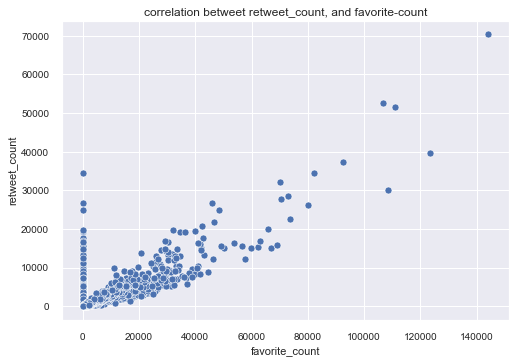

In [1528]:
# 1. What is the correlation betweeen retweet_count and favorite_count
#plots a scatter plot to display the correlation between favorite_count and retweet_count
sns.scatterplot(data=twitter_archive_master, x='favorite_count', y='retweet_count').set(title = 'correlation betweet retweet_count, and favorite-count')
sns.set(rc={'figure.figsize':(15, 10)})

The above scatter plot shows that there is a positive correlation between retweet_counts and favorite_counts.

Text(0.5, 1.0, 'Variables Correlation')

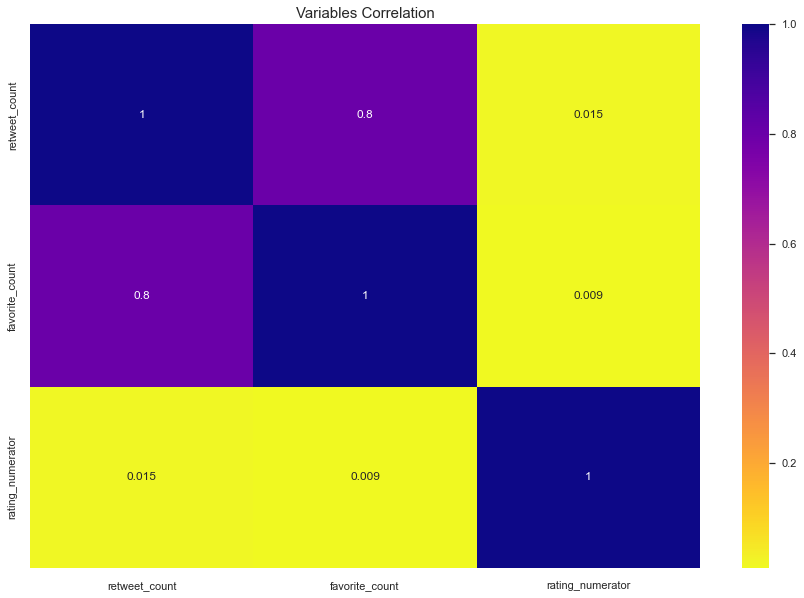

In [1530]:
sns.heatmap(twitter_archive_master[['retweet_count','favorite_count', 'rating_numerator']].corr(), cmap="plasma_r", annot=True)
plt.title('Variables Correlation', size=15)

strongest correlation is between retweet_count and and favorite count having a correlation coefficient of 0.8

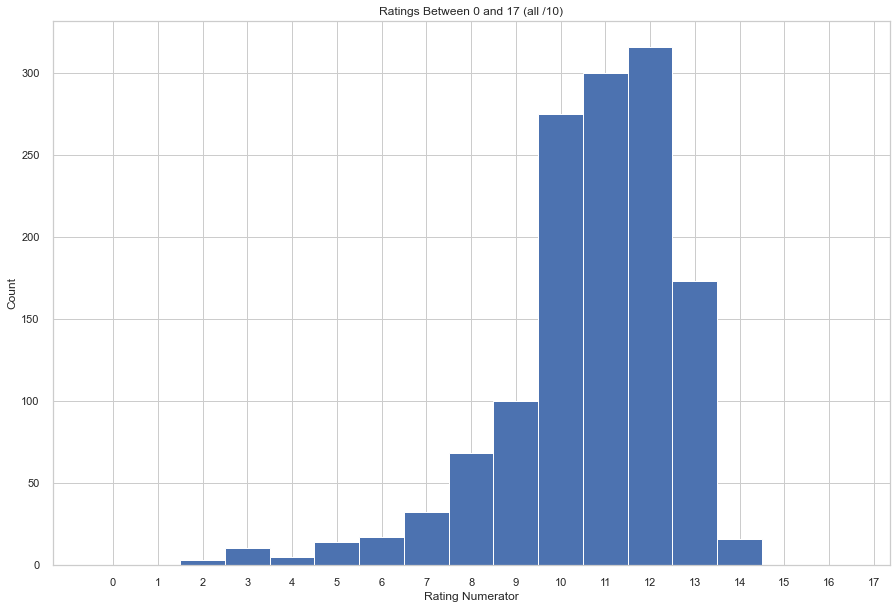

In [1548]:
# 2. let's plot the ratings that are less than 20
plt.hist(twitter_archive_master.rating_numerator[twitter_archive_master.rating_numerator <= 17], 
         bins=np.arange(0,18,step=1), align='left');
plt.xticks(np.arange(0,18,step=1));
plt.title('Ratings Between 0 and 17 (all /10)');
plt.xlabel('Rating Numerator');
plt.ylabel('Count');

The bar chart above shows dogs with ratings numerator of between 10-12 have the most likes.

[Text(0.5, 1.0, 'popular dog stage distribution')]

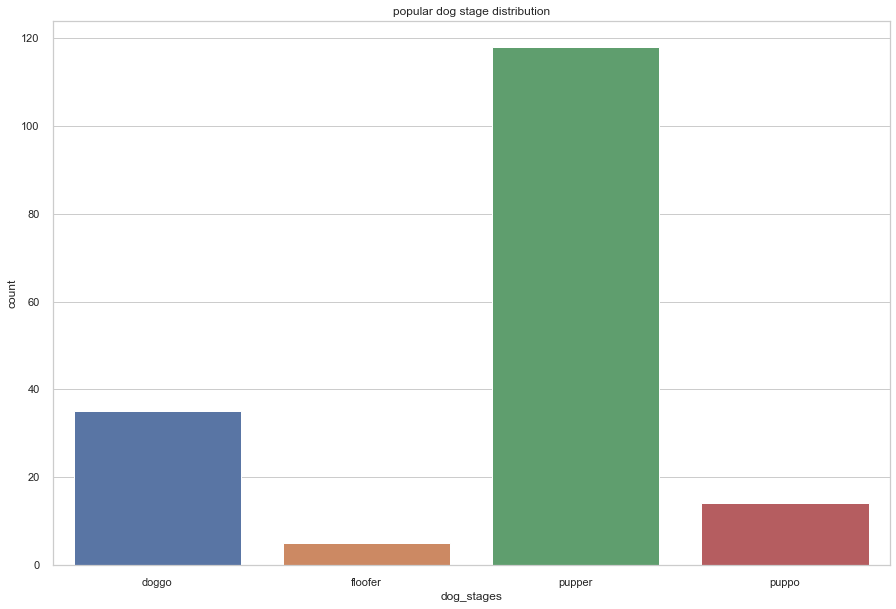

In [1549]:
# 3. bar chart of the dog_stages showing the count of the dog stage column 
sns.countplot(x = 'dog_stages', data = twitter_archive_master).set(title = 'popular dog stage distribution')

The bar chart above shows pupper is the most popular dog stage, followed by doggo

In [1531]:
twitter_archive_master['dog_stages'].value_counts()

pupper     118
doggo       35
puppo       14
floofer      5
Name: dog_stages, dtype: int64

In [1550]:
# 4. Popular source medium for twitter
source_medium = twitter_archive_master['source'].value_counts().index
twitter_archive_master['source'].value_counts()

Twitter for iPhone     1268
Vine - Make a Scene      41
Twitter Web Client       16
TweetDeck                 8
Name: source, dtype: int64

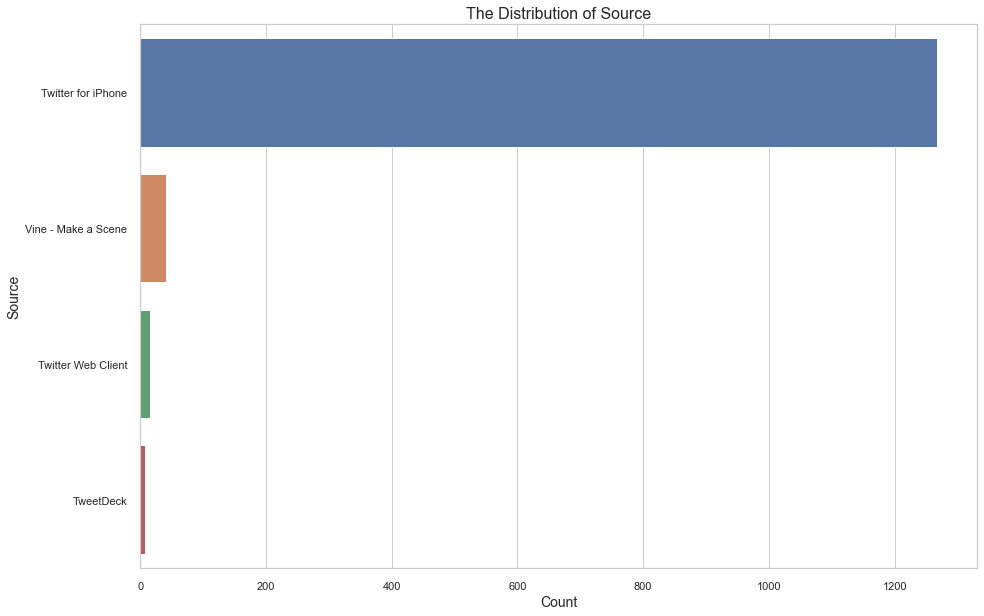

In [1539]:
sns.countplot(data = twitter_archive_master, y = 'source', order = source_medium)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16);

Its clearly observed that twitter for iphone was mostly used medium that individuals used to access and rate the dogs